In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('skyscraper.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

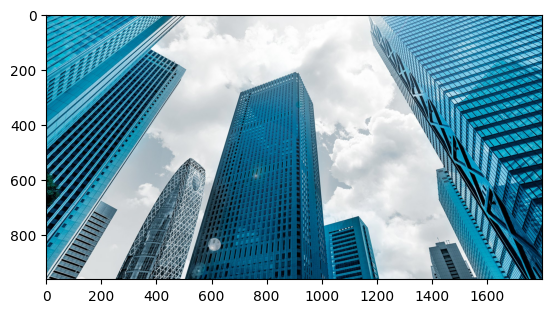

In [3]:
plt.imshow(image)
plt.show()

In [4]:
bw_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

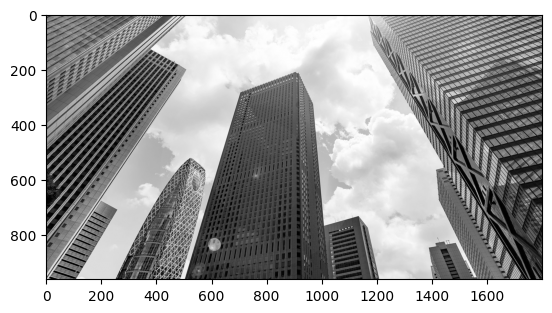

In [5]:
plt.imshow(bw_image, cmap='gray')
plt.show()

In [6]:
bw_image_blur = cv2.GaussianBlur(bw_image, (7,7), 0)

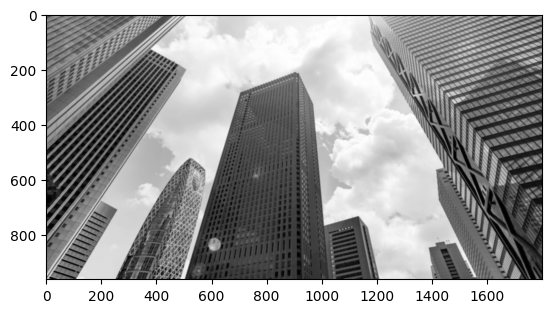

In [7]:
plt.imshow(bw_image_blur, cmap='gray')
plt.show()

In [8]:
# Ядро Собеля-Фельдмана для вычисления производных
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

kernel_y = np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]])


In [9]:
der_img_x = cv2.filter2D(bw_image_blur, -1, kernel_x)
der_img_y = cv2.filter2D(bw_image_blur, -1, kernel_y)

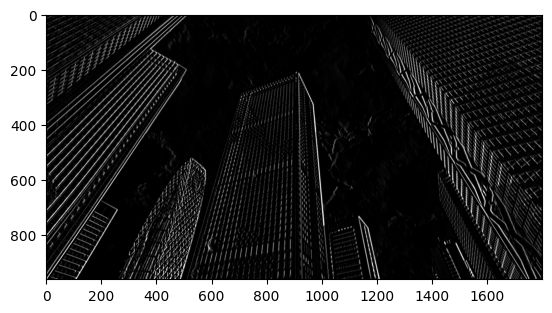

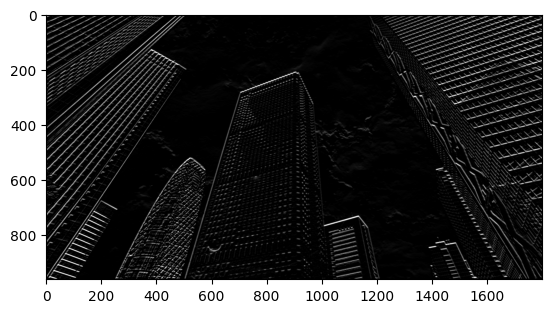

In [10]:
plt.imshow(der_img_x, cmap='gray')  
plt.show()
plt.imshow(der_img_y, cmap='gray')
plt.show()

In [11]:
height, width = image.shape[:2]

In [12]:
grad_img_abs = np.zeros(image.shape[:2])
grad_img_ang = np.zeros(image.shape[:2])
for i in range(height):
    for j in range(width):
        grad_img_abs[i][j] = np.sqrt(der_img_y[i][j]**2 + der_img_x[i][j]**2)   
        grad_img_ang[i][j] = np.arctan(der_img_y[i][j]/der_img_x[i][j]) * 360/np.pi if der_img_x[i][j] else 90


C:\Users\Егор\AppData\Local\Temp\ipykernel_18336\1243667114.py:5: RuntimeWarning: overflow encountered in scalar add
  grad_img_abs[i][j] = np.sqrt(der_img_y[i][j]**2 + der_img_x[i][j]**2)


In [13]:
print(grad_img_abs[100])

[ 0.  8.  4. ... 13.  6.  0.]


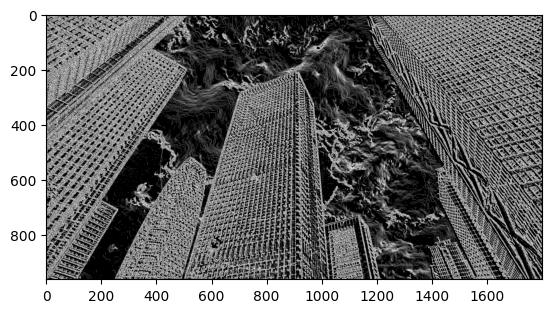

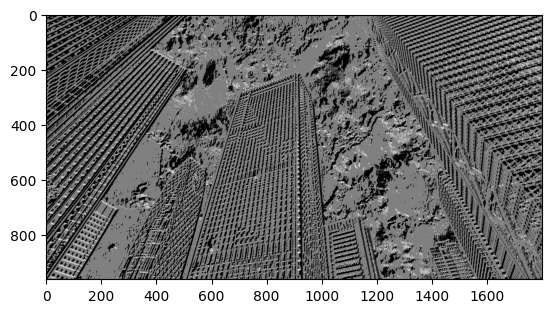

In [14]:
plt.imshow(grad_img_abs, cmap='gray')
plt.show()
plt.imshow(grad_img_ang, cmap='gray') 
plt.show()

In [15]:
grad_abs_max = np.max(grad_img_abs)
print(np.max(grad_img_abs))
print(np.min(grad_img_ang))

15.8125
0.0


In [16]:
temp = grad_img_abs
for i_x in range(width): 
    for i_y in range(height):
        grad_ang = grad_img_ang[i_y][i_x]
        grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)

        neighb_1_x, neighb_1_y = 0, 0
        neighb_2_x, neighb_2_y = 0, 0
        
        # selecting the neighbours of the target pixel 
        # according to the gradient direction 
        # In the x axis direction
        if grad_ang <= 22.5 or grad_ang > 180 - 22.5: 
            neighb_1_x, neighb_1_y = i_x-1, i_y 
            neighb_2_x, neighb_2_y = i_x + 1, i_y 
      
        # top right (diagonal-1) direction 
        elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
            neighb_1_x, neighb_1_y = i_x-1, i_y-1
            neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
          
        # In y-axis direction 
        elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
            neighb_1_x, neighb_1_y = i_x, i_y-1
            neighb_2_x, neighb_2_y = i_x, i_y + 1
          
        # top left (diagonal-2) direction 
        elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
            neighb_1_x, neighb_1_y = i_x-1, i_y + 1
            neighb_2_x, neighb_2_y = i_x + 1, i_y-1
          

  
           
        # Non-maximum suppression step 
        if (width > neighb_1_x) and (height > neighb_1_y) : 
            if grad_img_abs[i_y][i_x] <= (grad_img_abs[neighb_1_y, neighb_1_x]): 
                temp[i_y, i_x]= 0 
                continue

        if (width > neighb_2_x) and (height > neighb_2_y): 
            if grad_img_abs[i_y][i_x] <= (grad_img_abs[neighb_2_y, neighb_2_x] + 0.1): 
                temp[i_y, i_x]= 0
grad_img_abs = temp             

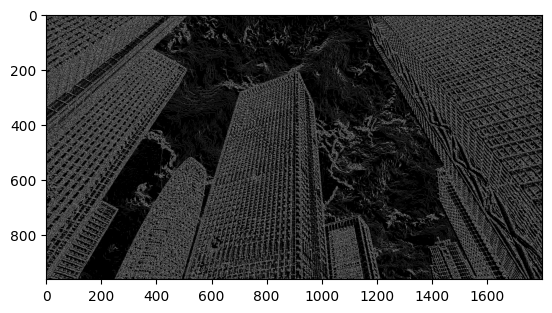

In [17]:
plt.imshow(grad_img_abs, cmap='gray')
plt.show()

In [18]:
ids = np.zeros(image.shape[:2]) 
             
strong_th, weak_th = grad_abs_max *0.85, grad_abs_max * 0.7
   
# double thresholding step 
for i_x in range(width): 
    for i_y in range(height): 
          
        grad_abs = grad_img_abs[i_y, i_x] 
          

        if grad_abs >= strong_th:
            ids[i_y][i_x] = 2
        elif grad_abs >= weak_th:
            ids[i_y][i_x] = 1

In [35]:
total = np.zeros(image.shape[:2])
print(total[1])
for i_x in range(1, width-1): 
    for i_y in range(1, height-1):
        number = 0
        if ids[i_y][i_x] == 2:
            total[i_y][ i_x] = 255
            continue
        elif ids[i_y][i_x] == 1:
            if ids[i_y - 1][ i_x - 1] == 2:
                number += 1
            if ids[i_y - 1][ i_x ] == 2:
                number += 1
            if ids[i_y - 1][ i_x + 1] == 2:
                number += 1
            if ids[i_y][ i_x - 1] == 2:
                number += 1
            if ids[i_y][ i_x + 1] == 2:
                number += 1
            if ids[i_y + 1][ i_x - 1] == 2:
                number += 1
            if ids[i_y + 1][ i_x] == 2:
                number += 1
            if ids[i_y + 1][ i_x + 1] == 2:
                number += 0
            if number == 1:
                total[i_y][ i_x] = 255
                ids[i_y][i_x] = 2
            

[0. 0. 0. ... 0. 0. 0.]


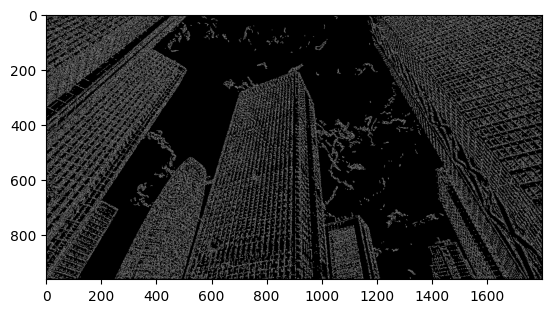

In [36]:
plt.imshow(total, cmap='gray')
plt.show()

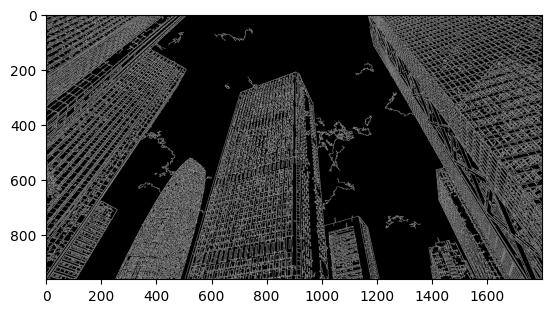

In [24]:
edge = cv2.Canny(bw_image, 25, 128) 
plt.imshow(edge, cmap='gray')
plt.show()